# Weather Data Interactive Time Series Plots (Using Plotly)
# Before Doing Anything Select the `WX` kernel (top right corner)

## This notebook generates interactive time series plots for various weather variables captured by the Vantage Pro 2 weather stations at Dale Fort and the University of Leed.

### Step 1: Import necessary libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the weather data
### The data has been collected from a weather station, and we assume it is in the same directory as this notebook.


In [51]:
#df = pd.read_csv('dale_fort_wx.csv', error_bad_lines=False)
df = pd.read_csv('see_wx.csv', error_bad_lines=False)

/tmp/ipykernel_1551/1467012570.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('see_wx.csv', error_bad_lines=False)


### Step 3: Convert dateTime column to pandas datetime format

In [36]:
df['# dateTime'] = pd.to_datetime(df['# dateTime'])

### Step 4: Convert units to metric

In [37]:
# Convert barometer and altimeter pressure from inHg to mbar (1 inHg = 33.8639 mbar)
df['altimeter'] = df['altimeter'] * 33.864
df['barometer'] = df['barometer'] * 33.864

In [38]:
# Convert temperatures from Fahrenheit to Celsius (°C = (°F - 32) * 5/9)
df['outTemp'] = (df['outTemp'] - 32) * 5 / 9
df['dewpoint'] = (df['dewpoint'] - 32) * 5 / 9
df['windchill'] = (df['windchill'] - 32) * 5 / 9

In [39]:
# Convert wind speed and gust from mph to m/s (1 mph = 0.44704 m/s)
df['windSpeed'] = df['windSpeed'] * 0.44704
df['windGust'] = df['windGust'] * 0.44704

In [40]:
# Convert rain rate from inches per hour to mm per hour (1 inch = 25.4 mm)
df['rainRate'] = df['rainRate'] * 25.4

In [41]:
# Convert cloudbase from feet to meters (1 foot = 0.3048 meters)
df['cloudbase'] = df['cloudbase'] * 0.3048

### Step 5: Define start and end times for filtering
Define the start and end time as string variables. Modify these variables as needed to filter data.

In [42]:
start_time = '2024-09-22 00:00:00'
end_time = '2024-09-22 23:59:00'

# Filter the dataframe based on the start and end time
filtered_df = df[(df['# dateTime'] >= start_time) & (df['# dateTime'] <= end_time)]

### Step 6: Plotting each variable as a time series within the selected time range

#### Barometer (Pressure in hPa)

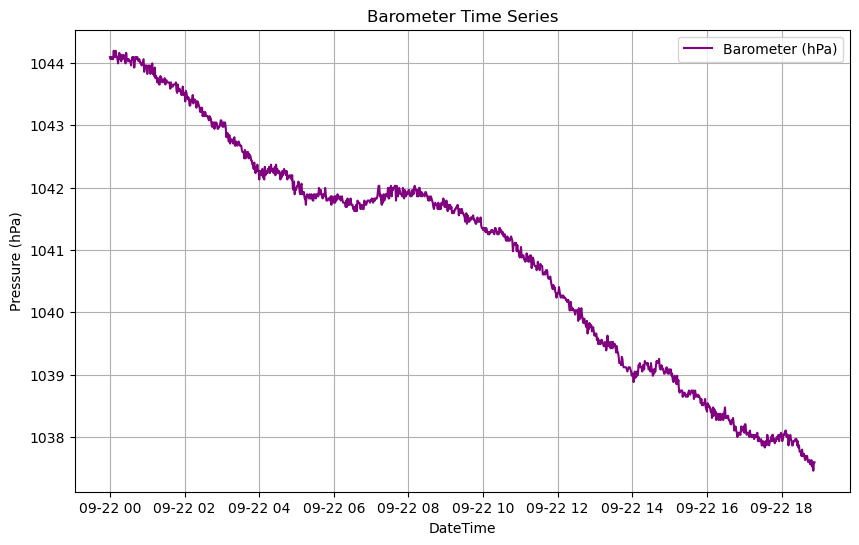

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['barometer'], label='Barometer (hPa)', color='purple')
plt.title('Barometer Time Series')
plt.xlabel('DateTime')
plt.ylabel('Pressure (hPa)')
plt.grid(True)
plt.legend()
plt.show()

#### Temperature (Celsius)

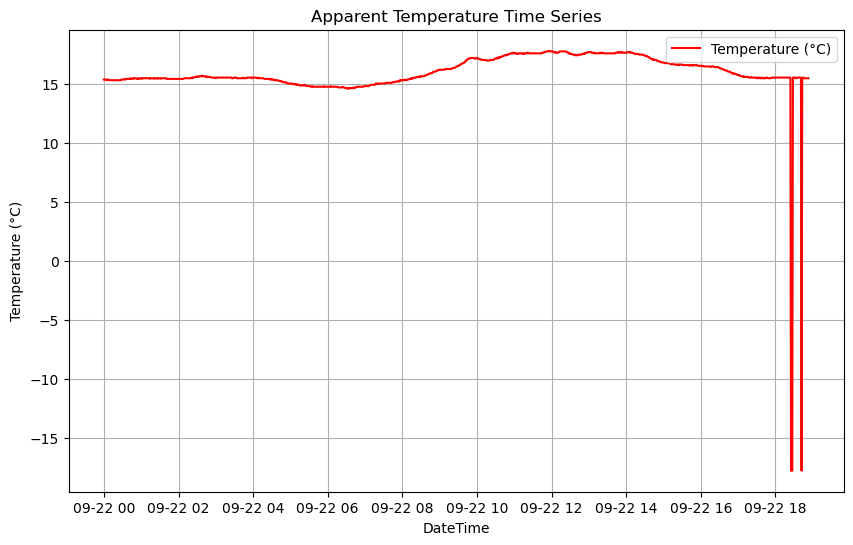

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['outTemp'], label='Temperature (°C)', color='Red')
plt.title('Apparent Temperature Time Series')
plt.xlabel('DateTime')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

#### Dewpoint (Celsius)

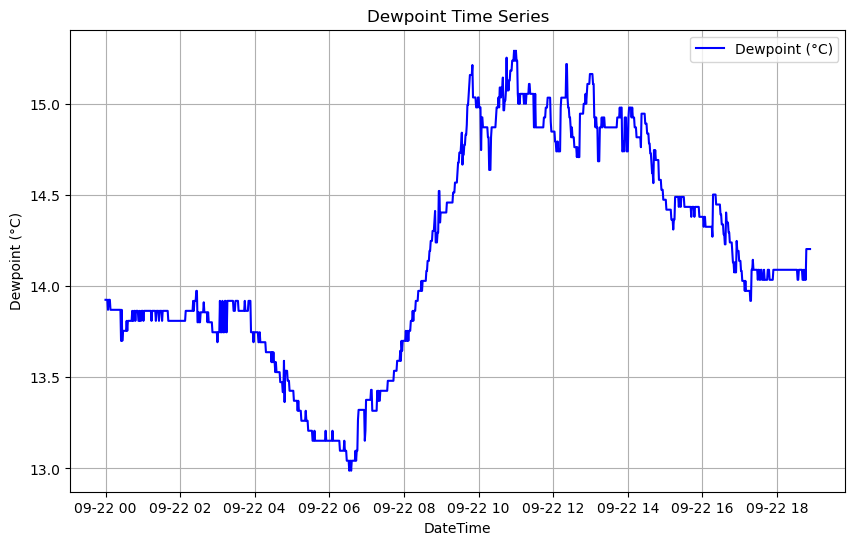

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['dewpoint'], label='Dewpoint (°C)', color='blue')
plt.title('Dewpoint Time Series')
plt.xlabel('DateTime')
plt.ylabel('Dewpoint (°C)')
plt.grid(True)
plt.legend()
plt.show()

#### Rain Rate (mm per hour)

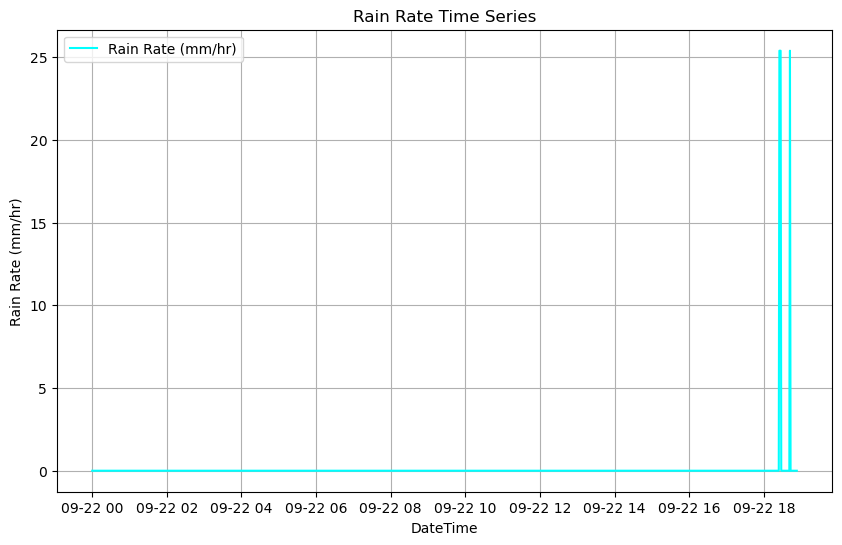

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['rainRate'], label='Rain Rate (mm/hr)', color='cyan')
plt.title('Rain Rate Time Series')
plt.xlabel('DateTime')
plt.ylabel('Rain Rate (mm/hr)')
plt.grid(True)
plt.legend()
plt.show()

#### Wind Speed and Wind Gust (m/s)

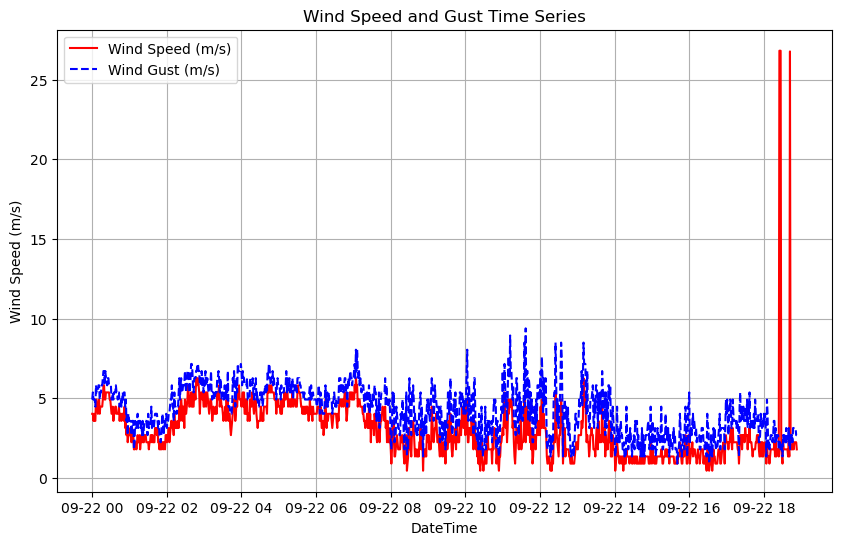

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['windSpeed'], label='Wind Speed (m/s)', color='red')
plt.plot(filtered_df['# dateTime'], filtered_df['windGust'], label='Wind Gust (m/s)', color='blue', linestyle='--')
plt.title('Wind Speed and Gust Time Series')
plt.xlabel('DateTime')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()
plt.show()

#### Relative Humidity

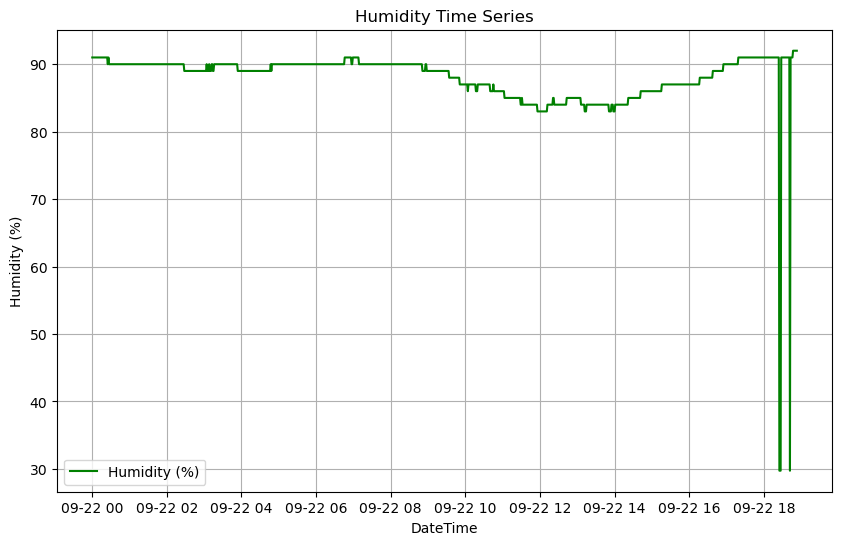

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['outHumidity'], label='Humidity (%)', color='green')
plt.title('Humidity Time Series')
plt.xlabel('DateTime')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.legend()
plt.show()

#### Radiation (not converted, assuming W/m^2)

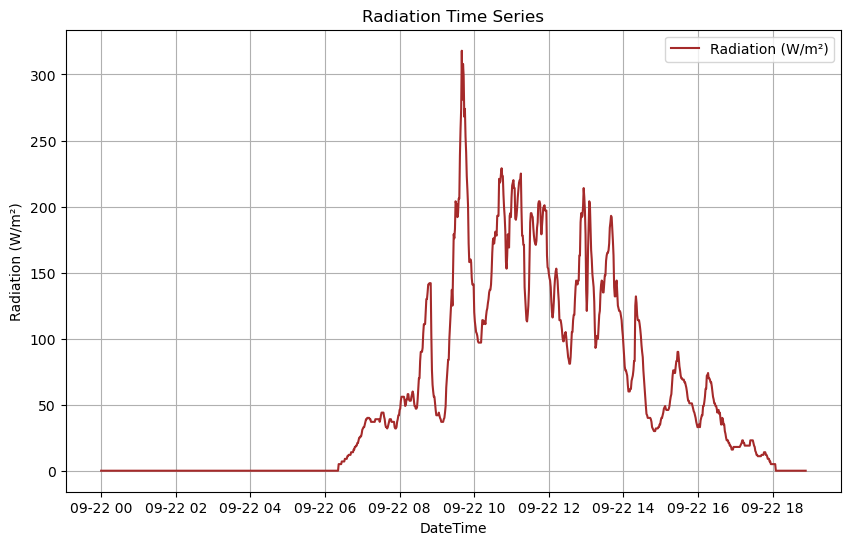

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['# dateTime'], filtered_df['radiation'], label='Radiation (W/m²)', color='brown')
plt.title('Radiation Time Series')
plt.xlabel('DateTime')
plt.ylabel('Radiation (W/m²)')
plt.grid(True)
plt.legend()
plt.show()